In [1]:
import numpy as np

from matplotlib import cbook
import matplotlib.pyplot as plt

In [2]:
np.random.seed(19823780)

In [3]:
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list("ABCD")

# compute the boxplot stats
stats = cbook.boxplot_stats(data, labels=labels, bootstrap=10000)

for n in range(len(stats)):
    stats[n]["med"] = np.median(data)
    stats[n]["mean"] *= 2

print(list(stats[0]))
fs = 10

['label', 'mean', 'iqr', 'cilo', 'cihi', 'whishi', 'whislo', 'fliers', 'q1', 'med', 'q3']


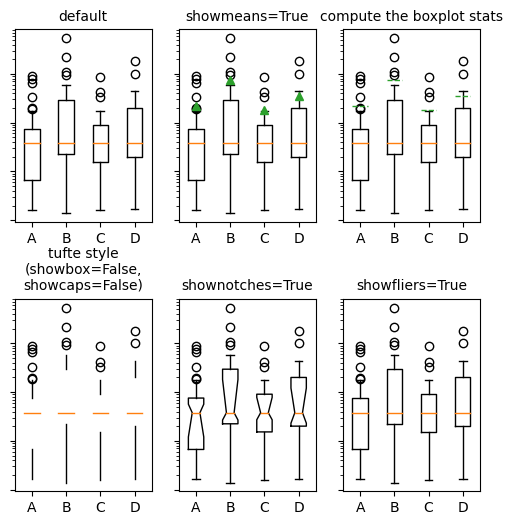

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)

axs[0, 0].bxp(stats)
axs[0, 0].set_title("default", fontsize=fs)

axs[0, 1].bxp(stats, showmeans=True)
axs[0, 1].set_title("showmeans=True", fontsize=fs)

axs[0, 2].bxp(stats, showmeans=True, meanline=True)
axs[0, 2].set_title("compute the boxplot stats", fontsize=fs)

axs[1, 0].bxp(stats, showbox=False, showcaps=False)
axs[1, 0].set_title("tufte style\n(showbox=False,\nshowcaps=False)", fontsize=fs)

axs[1, 1].bxp(stats, shownotches=True)
axs[1, 1].set_title("shownotches=True", fontsize=fs)

axs[1, 2].bxp(stats, showfliers=True)
axs[1, 2].set_title("showfliers=True", fontsize=fs)

for ax in axs.flat:
    ax.set_yscale("log")
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()

In [5]:
boxprops = {"linestyle": "--", "linewidth": 3, "color": "darkgoldenrod"}
flierprops = {"marker": "o", "markerfacecolor": "green", "markersize": 12, "linestyle": "none"}
medianprops = {"linestyle": "-", "linewidth": 2.5, "color": "firebrick"}
meanpointprops = {"marker": "D", "markeredgecolor": "black", "markerfacecolor": "firebrick"}
meanlineprops = {"linestyle": "--", "linewidth": 2.5, "color": "purple"}

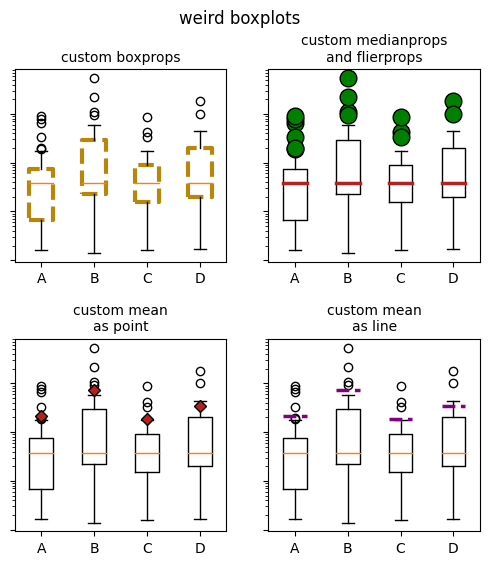

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6), sharey=True)

axs[0, 0].bxp(stats, boxprops=boxprops)
axs[0, 0].set_title("custom boxprops", fontsize=fs)

axs[0, 1].bxp(stats, flierprops=flierprops, medianprops=medianprops)
axs[0, 1].set_title("custom medianprops\nand flierprops", fontsize=fs)

axs[1, 0].bxp(stats, meanprops=meanpointprops, meanline=False, showmeans=True)
axs[1, 0].set_title("custom mean\nas point", fontsize=fs)

axs[1, 1].bxp(stats, meanprops=meanlineprops, meanline=True, showmeans=True)
axs[1, 1].set_title("custom mean\nas line", fontsize=fs)

for ax in axs.flat:
    ax.set_yscale("log")
    ax.set_yticklabels([])

fig.suptitle("weird boxplots")
fig.subplots_adjust(hspace=0.4)
plt.show()